# Support Vector Machines

In this exercise, you will be using support vector machines (SVMs) with an example 2D dataset. Experimenting with the dataset will help you gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs.



## SVM with Gaussian Kernels
In this part of the exercise, you will be using SVMs to do non-linear classification. In particular, you will be using SVMs with Gaussian kernels on datasets that are not linearly separable. 

To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. You can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, (x(i), x(j)). The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples move further apart. 

In the provided dataset, pset6data.mat, you are given the variables X, y, Xval, yval. The code trains the SVM classifier using the training set (X, y). We will use the Xval and yval as validation datasets on the following steps.

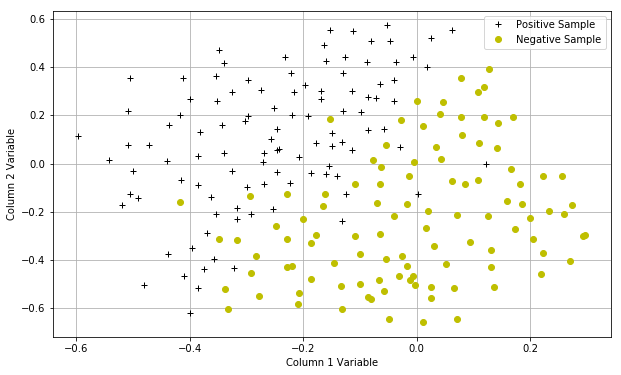

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io #Used to load the OCTAVE *.mat files
import scipy.optimize #fmin_cg to train the linear regression
from sklearn import svm #SVM software

datafile = 'data/pset6data.mat'
mat = scipy.io.loadmat( datafile )
#Training set
X, y = mat['X'], mat['y']
Xval, yval = mat['Xval'], mat['yval']

#Divide the sample into two: ones with positive classification, one with null classification
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])


def plot_data():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,0],pos[:,1],'k+',label='Positive Sample')
    plt.plot(neg[:,0],neg[:,1],'yo',label='Negative Sample')
    plt.xlabel('Column 1 Variable')
    plt.ylabel('Column 2 Variable')
    plt.legend()
    plt.grid(True)
    
plot_data()

## Implement the plot_boundary() method. [15 pts]

In [2]:
def plot_boundary(my_svm, xmin, xmax, ymin, ymax):
    """
    Function to plot the decision boundary for a trained SVM
    It works by making a grid of x1 ("xvals") and x2 ("yvals") points,
    And for each, compute whether the SVM classifies that point as
    True or False. Then, a contour is drawn with a built-in pyplot function.
    """
    xvals = np.linspace(xmin,xmax,100)
    yvals = np.linspace(ymin,ymax,100)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            zvals[i][j] = float(my_svm.predict(np.array([xvals[i],yvals[j]]).reshape(1, -1)))
    zvals = zvals.transpose()

    u, v = np.meshgrid( xvals, yvals )
    contour = plt.contour( xvals, yvals, zvals, [0])
    plt.title("Decision Boundary")

## Implement Gauss Kernel [15 pts]

The $\gamma$ parameter is defined as the inverse of deviation of the Gauss Function. That is $\gamma = \sigma^{-2}$.

In [3]:
def gauss_kernel(x1, x2, gamma):
    return np.exp(-(x1-x2).T.dot(x1-x2)/(2*gamma))

# x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;
# sim = gauss_kernel(x1, x2, gamma);
# output should be 0.324652467358
print (gauss_kernel(np.array([1, 2, 1]),np.array([0, 4, -1]), 4.))

0.324652467358


## Train SVM [10 pts]
Use the builtin SVM classifier and rbf kernel to train a new model. Use $\sigma = 0.1$ and $C=2$
You should get a similar decision boundary as this:
![svm](data/svm.png 'Decision Boundary')

[Optional] Also try use your own gauss kernel to train the model. You would need to make sure the size of data of validation to be the same of training as the kernel you implemented is a precomputed kernel.


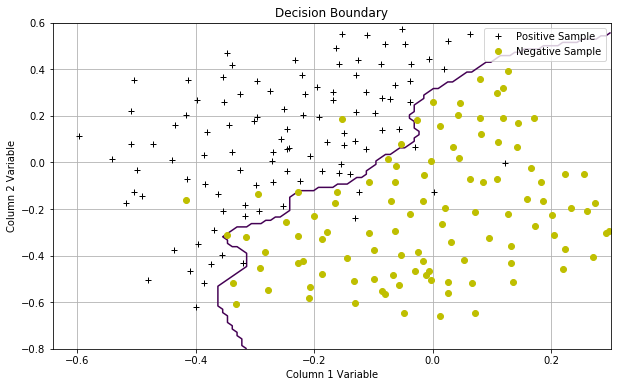

In [4]:
# Train the SVM with the Gaussian kernel on this dataset.
sigma = 0.1
gamma = np.power(sigma,-2.)
gaus_svm = svm.SVC(C=2, kernel='rbf', gamma=gamma)
gaus_svm.fit( X, y.flatten() )
plot_data()
plot_boundary(gaus_svm,-.5,.3,-.8,.6)

## Finetune Parameters [30 pts]
Your task is to use the cross validation set Xval, yval to determine the best C and $\sigma$ parameter to use. You should write any additional code necessary to help you search over the parameters C and $\sigma$. For both C and $\sigma$, we suggest trying values in multiplicative steps (e.g., 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30). Note that you should try all possible pairs of values for C and  (e.g., C = 0.3 and  $\sigma$ = 0.1). For example, if you try each of the 8 values listed above for C and for $\sigma^2$, you would end up training and evaluating (on the cross validation set) a total of $8^2 = 64$ different models. 

After you have determined the best C and $\sigma$ parameters to use, you should filling in the best parameters you found. For our best parameters, the SVM returned a decision boundary:

![bestsvm](data/bestsvm.png "Decision Boundary -- Best Parameter Found")


Hint: The score() function for a trained SVM takes in X and y to test the score on, and the (float) value returned is "Mean accuracy of self.predict(X) with respect to y"


Best C, sigma pair is (0.300000, 0.100000) with a score of 0.965000.


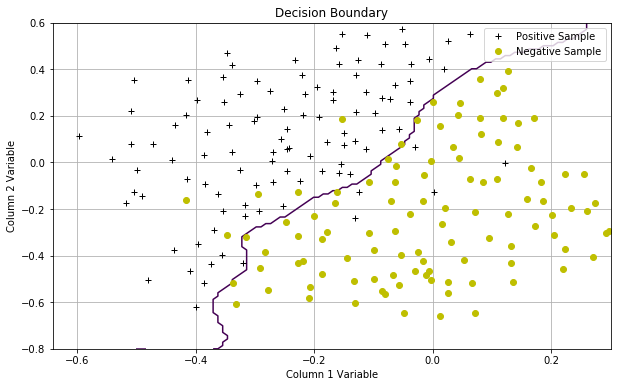

In [5]:
Cvalues = (0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.)
sigmavalues = Cvalues
best_pair, best_score = (0, 0), 0

for Cvalue in Cvalues:
    for sigmavalue in sigmavalues:
        gamma = np.power(sigmavalue,-2.)
        gaus_svm = svm.SVC(C=Cvalue, kernel='rbf',gamma=gamma)
        gaus_svm.fit( X, y.flatten() )
        this_score = gaus_svm.score(Xval,yval)
        #print this_score
        if this_score > best_score:
            best_score = this_score
            best_pair = (Cvalue, sigmavalue)
            
print ("Best C, sigma pair is (%f, %f) with a score of %f."%(best_pair[0],best_pair[1],best_score))
gamma = np.power(best_pair[1], -2.)
gaus_svm = svm.SVC(C=best_pair[0], kernel='rbf', gamma=gamma)
gaus_svm.fit( X, y.flatten() )
plot_data()
plot_boundary(gaus_svm,-.5,.3,-.8,.6)

# Written Problems

## Derivations of SVM [10 pts]
Read section 6.1 in Bishop, and work through all of the steps of the derivations in equations 6.2-6.9. You should understand how the derivation works in detail. Write down your understanding.

## Kernels [10 pts]

Read Section 6.2 and Verify the results (6.13) and (6.14) for constructing valid kernels.

![solution](data/solution1.png)

## Maximum Margin Classifiers [10 pts]
Read section 7.1 and show that, if the 1 on the right hand side of the constraint (7.5) is replaced by some arbitrary constant $\gamma > 0$, the solution for maximum margin hyperplane is unchanged.

$$t_n(w^T \phi(x_n) + b) \geq 1$$

![solution](data/solution2.png)